In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import regex as re
import datetime
import calendar

In [3]:
og_data=pd.read_excel("/content/drive/MyDrive/Flight_details.xlsx")
data=og_data.copy()
og_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
data.describe(include="O")


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.duplicated().sum()

220

# Data Visualization



## Univariate Analysis



In [10]:
fig = px.histogram(data, x="Source")
fig.show()

In [11]:
fig = px.histogram(data, x="Destination")
fig.show()

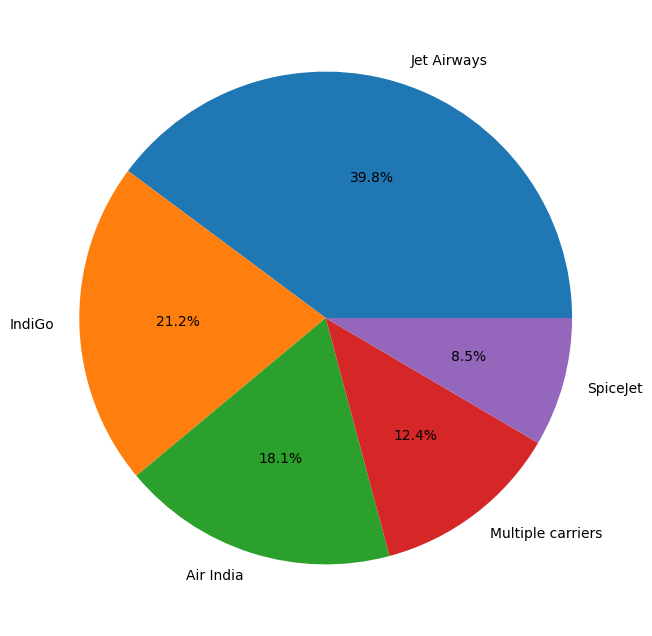

In [12]:
data_airline = data.groupby(data["Airline"]).count()
data_airline_sort = data_airline.sort_values(by=["Source"], ascending=False)

label = []
for airline in data_airline_sort.head(5).index:
    label.append(airline)

plt.figure(figsize=(8,8))
plt.pie(data_airline_sort["Source"].head(5), labels=label, autopct="%.1f%%")
plt.show()

## Bivariate Analysis

### Extracting meaningful information from duration column

In [13]:
def duration_To_Minutes(duration):
  dur_split=re.split('[hm]',duration)

  minutes=0

  for i in range(len(dur_split)):
    if dur_split[i]!='':
      if i==0:
        minutes=int(dur_split[i])*60
      elif i==1:
        minutes+=int(dur_split[i])

  return minutes


In [14]:
data["Duration"]=data["Duration"].apply(duration_To_Minutes)
data["Duration"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [15]:
fig=px.scatter(data,x="Duration",y="Price",color="Total_Stops")
fig.show()

### Day of Journey vs Price

In [16]:
def jour_day(date):
    day = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
    return (calendar.day_name[day])

def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

def sep_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

data["Journey_day"] = data['Date_of_Journey'].apply(jour_day)

for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

data["Journey_date"] = data['Date_of_Journey'].dt.day
data["Journey_month"]=data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

sep_hour_min(data , "Dep_Time")
sep_hour_min(data,"Arrival_Time")

data.drop(["Arrival_Time" , "Dep_Time"],axis=1,inplace=True)
data

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,Sunday,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,Wednesday,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,Sunday,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,Sunday,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,Friday,3,1,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,Tuesday,4,9,2019,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,Saturday,27,4,2019,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,Saturday,27,4,2019,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,Friday,3,1,2019,11,30,14,10


In [17]:
fig=px.scatter(data,x="Journey_day",y="Price")
fig.show()

### Airline vs Price

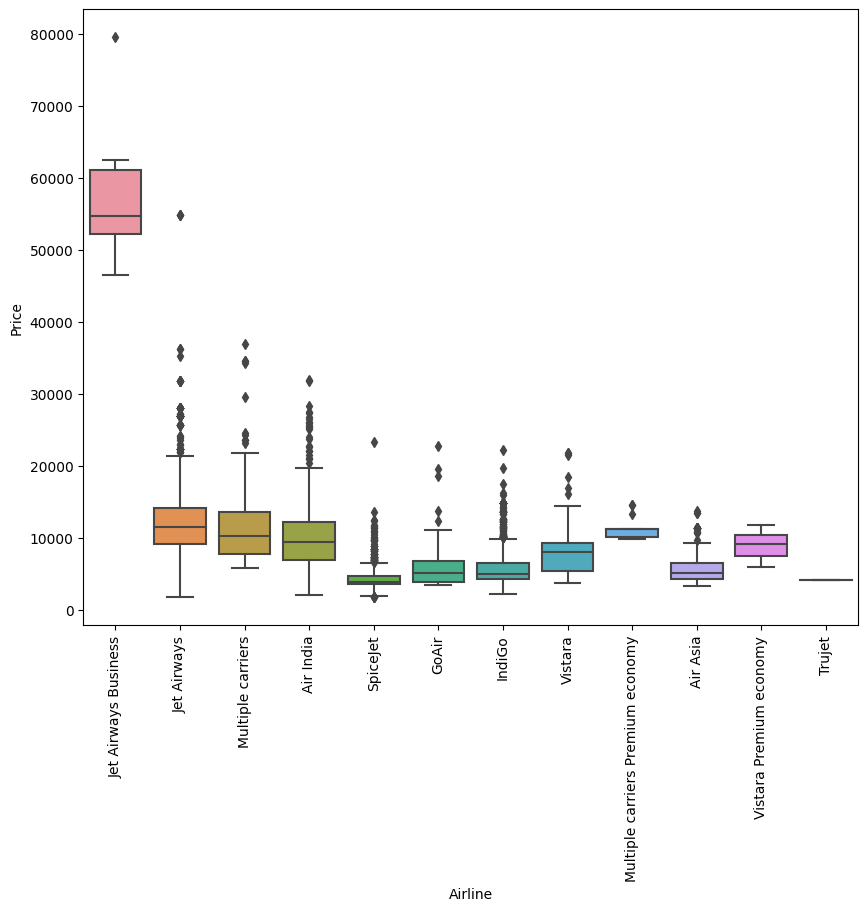

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

# Data Pre-Processing

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  int64         
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   Journey_day          10682 non-null  object        
 10  Journey_date         10682 non-null  int64         
 11  Journey_month        10682 non-null  int64         
 12  Journey_year         10682 non-null  int64         
 13  Dep_Time_hour        10682 non-

In [20]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [21]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [22]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [23]:
def stops_to_num(stop):
    if stop == "1 stop":
        stop = 1
    elif stop == "2 stops":
        stop = 2
    elif stop == "3 stops":
        stop = 3
    elif stop == "4 stops":
        stop = 4
    else:
        stop = 0
    return stop

In [24]:
data["Total_Stops"]=data["Total_Stops"].apply(stops_to_num)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,170,0,No info,3897,Sunday,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,Wednesday,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,Sunday,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,Sunday,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,285,1,No info,13302,Friday,3,1,2019,16,50,21,35


In [25]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()

data["Airline"] = l_enc.fit_transform(data["Airline"])
data["Source"] = l_enc.fit_transform(data["Source"])
data["Destination"] = l_enc.fit_transform(data["Destination"])
data["Journey_day"] = l_enc.fit_transform(data["Journey_day"])
data["Additional_Info"] = l_enc.fit_transform(data["Additional_Info"])


In [26]:
data.dtypes

Airline                         int64
Date_of_Journey        datetime64[ns]
Source                          int64
Destination                     int64
Route                          object
Duration                        int64
Total_Stops                     int64
Additional_Info                 int64
Price                           int64
Journey_day                     int64
Journey_date                    int64
Journey_month                   int64
Journey_year                    int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
dtype: object

In [27]:
#Since we have already extracted the needed features from date of journey, we can drop it
#The column Journey_year only has one constant value throughout(2019), so we can drop it as well
#We can also drop Column route as it gives us the same information as Total stops
data.drop(columns=['Date_of_Journey' , 'Journey_year','Route'] , axis=1 , inplace=True)
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,3,0,2,170,0,8,3897,3,24,3,22,20,1,10
1,1,3,0,445,2,8,7662,6,5,1,5,50,13,15


# Dealing with Outliers

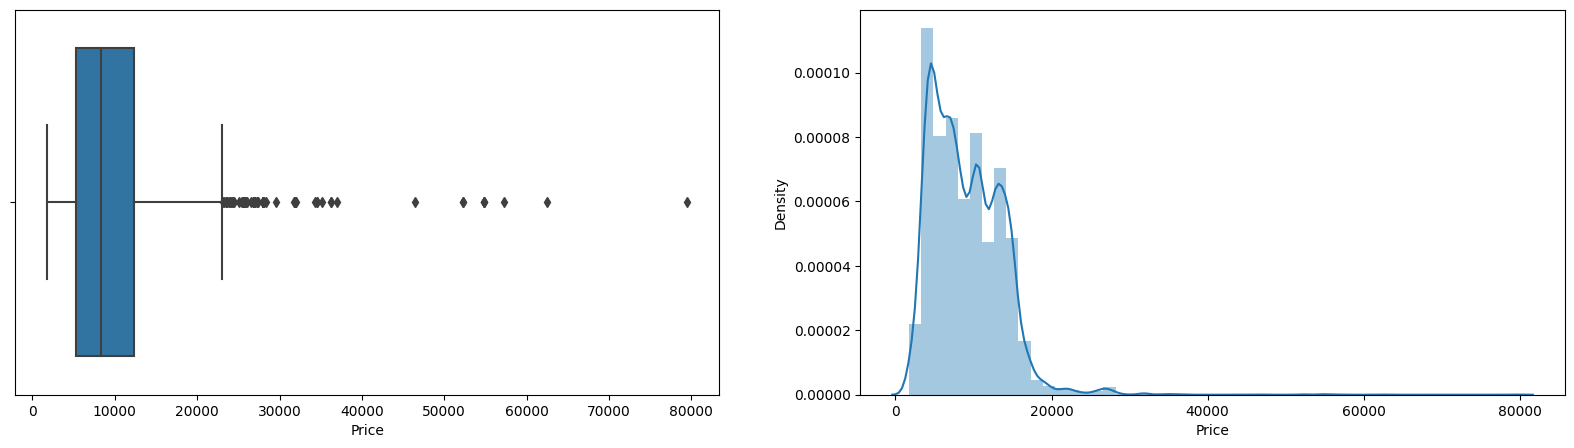

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x=data["Price"])

plt.subplot(1,2,2)
sns.distplot(data["Price"])

plt.show()

### using Inter Quartile range(IQR) to deal with outliers

In [29]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

print("max =",maximum)
print("min =",minimum)

max = 23017.0
min = -5367.0


In [30]:
# We will be replacing all those values greater or smaller than minimum and maximum values
# by the median of the price as median is the least affected due to outliers

data["Price"]=np.where(data['Price']>maximum , data['Price'].median() , data['Price'])

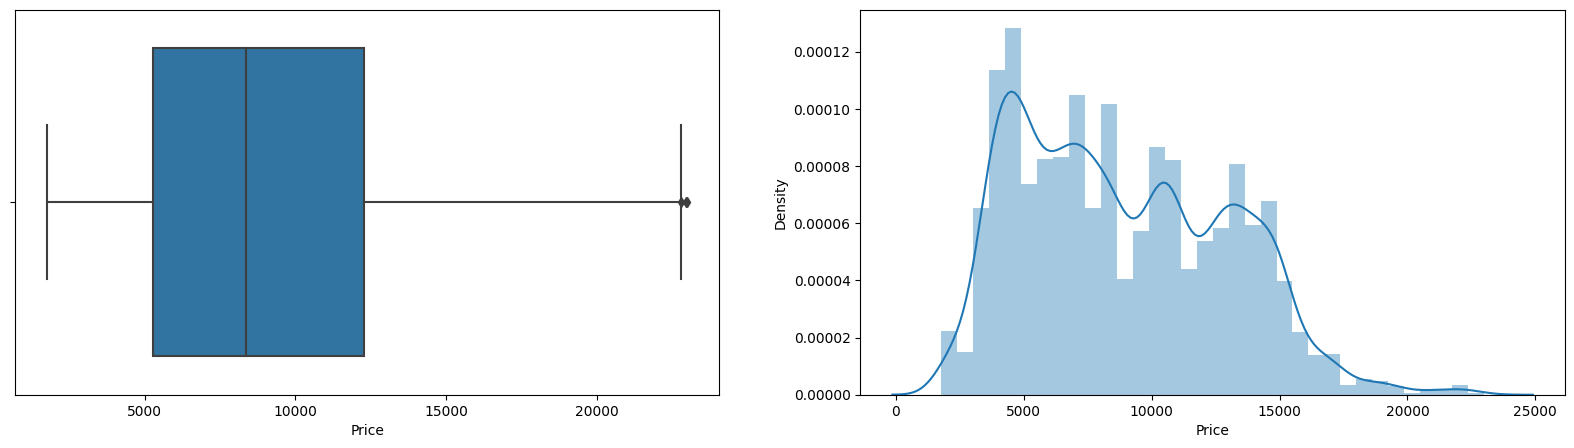

In [31]:
plt.figure(figsize=(20,5))
plt.title("After Dealing with Outliers")

plt.subplot(1,2,1)
sns.boxplot(x=data["Price"])

plt.subplot(1,2,2)
sns.distplot(data["Price"])

plt.show()

# Model Creation

In [32]:
X=data.drop(["Price"],axis=1)
Y=data["Price"]

## Linear Regression

To use our dataset for linear regression, we have to scale it

In [33]:
data.describe()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.174406,643.048118,0.824190,7.392998,8893.168695,3.160270,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601
std,2.352090,1.177276,1.012980,507.803454,0.675229,1.214254,4051.640946,1.959032,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808
min,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000,1759.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,170.000000,0.000000,8.000000,5277.000000,1.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,520.000000,1.000000,8.000000,8372.000000,3.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,930.000000,1.000000,8.000000,12284.000000,5.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,4.000000,2860.000000,4.000000,9.000000,23001.000000,6.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


In [34]:
from sklearn.preprocessing import MinMaxScaler

min_max_scl = MinMaxScaler()

X_scl = min_max_scl.fit_transform(X)
X_scl = pd.DataFrame(X_scl, columns = data.columns[0:13])
X_scl.describe()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.360564,0.488064,0.293601,0.203967,0.206048,0.821444,0.526712,0.403455,0.412248,0.543088,0.443805,0.580399,0.448920
std,0.213826,0.294319,0.253245,0.182335,0.168807,0.134917,0.326505,0.366825,0.271602,0.249949,0.341233,0.298231,0.300124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.500000,0.000000,0.034111,0.000000,0.888889,0.166667,0.083333,0.181818,0.347826,0.090909,0.347826,0.181818
50%,0.363636,0.500000,0.250000,0.159785,0.250000,0.888889,0.500000,0.125000,0.363636,0.478261,0.454545,0.608696,0.454545
75%,0.363636,0.750000,0.500000,0.307002,0.250000,0.888889,0.833333,0.750000,0.454545,0.782609,0.727273,0.826087,0.636364
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X_scl, Y, test_size=0.3, random_state=42)

reg=LinearRegression()
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_test)

mse=mean_squared_error(Y_test,y_pred)
print(f"Mean Squared Error = {mse:.2f}")

r2=r2_score(Y_test,y_pred)
print(f"R2 Score = {r2:.2f}")

mae=mean_absolute_error(Y_test,y_pred)
print(f"Mean Absolute Error = {mae:.2f}")

Mean Squared Error = 8062232.51
R2 Score = 0.51
Mean Absolute Error = 2231.30


## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

X_train_act, X_test_act, Y_train_act, Y_test_act = train_test_split(X, Y, test_size=0.3, random_state=42)

param_search={
    "criterion": ['absolute_error', 'poisson', 'squared_error'],
    "splitter": ["best", "random"],
    "max_depth": (list(range(1,10))),
    "min_samples_split": [2,3,4,5],
    "min_samples_leaf": (list(range(1,5)))
}

dec_reg=DecisionTreeRegressor()

dec_tree_cv = GridSearchCV(dec_reg, param_search, scoring='r2',refit=True, n_jobs=-1)
dec_tree_cv.fit(X_train_act,Y_train_act)

print(dec_tree_cv.best_params_)
print(dec_tree_cv.best_score_)

{'criterion': 'poisson', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
0.8186049624546804


In [39]:
from sklearn.tree import DecisionTreeRegressor

dec_reg = DecisionTreeRegressor(criterion='poisson', max_depth=9, min_samples_leaf=2,min_samples_split=5, splitter='best')
dec_reg.fit(X_train_act, Y_train_act)

y_pred = dec_reg.predict(X_test_act)

mse=mean_squared_error(Y_test_act,y_pred)
print(f"Mean Squared Error = {mse:.2f}")

r2=r2_score(Y_test_act,y_pred)
print(f"R2 Score = {r2:.2f}")

mae=mean_absolute_error(Y_test_act,y_pred)
print(f"Mean Absolute Error = {mae:.2f}")

Mean Squared Error = 2748235.69
R2 Score = 0.83
Mean Absolute Error = 1012.93


## Random Forest

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rand_frst_parm_search = {
    'n_estimators' : [50,100,150,200],
    'max_features' : ["sqrt", "log2", "auto"],
    'max_depth' : [10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
}

rand_reg = RandomForestRegressor(random_state=9)
rand_frst_cv = RandomizedSearchCV(estimator=rand_reg, scoring='r2', param_distributions=rand_frst_parm_search,n_iter=100, n_jobs=-1, random_state=42)

rand_frst_cv.fit(X_train_act, Y_train_act)
print("Best parameters for all features:", rand_frst_cv.best_params_)


Best parameters for all features: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


In [41]:
rand_reg = RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=1,max_features="auto", max_depth=20, random_state=42)
rand_reg.fit(X_train_act, Y_train_act)
y_pred = rand_reg.predict(X_test_act)

mse=mean_squared_error(Y_test_act,y_pred)
print(f"Mean Squared Error = {mse:.2f}")

r2=r2_score(Y_test_act,y_pred)
print(f"R2 Score = {r2:.2f}")

mae=mean_absolute_error(Y_test_act,y_pred)
print(f"Mean Absolute Error = {mae:.2f}")

Mean Squared Error = 1634790.20
R2 Score = 0.90
Mean Absolute Error = 677.63
